## Prep mme

In [1]:
import pandas as pd

df_total = pd.read_csv('subset.csv')

In [2]:
df_total.shape

(4000000, 41)

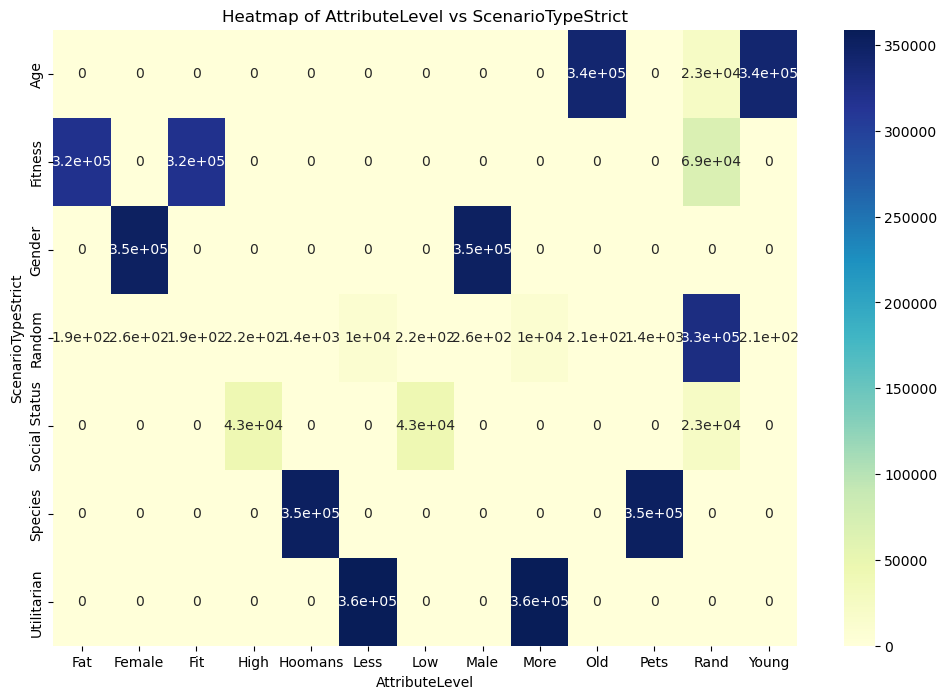

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(df_total['ScenarioTypeStrict'], df_total['AttributeLevel'])

plt.figure(figsize=(12,8))

# Plot a heatmap
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title('Heatmap of AttributeLevel vs ScenarioTypeStrict')
plt.xlabel('AttributeLevel')
plt.ylabel('ScenarioTypeStrict')
plt.show()

In [4]:
df_total['AttributeLevel'].value_counts()

AttributeLevel
Rand       442488
More       369398
Less       369398
Pets       354170
Hoomans    354170
Male       351791
Female     351791
Young      341224
Old        341224
Fit        318965
Fat        318965
Low         43208
High        43208
Name: count, dtype: int64

In [5]:
# deleting rows with 'Low' and 'High' values in the 'AttributeLevel' column, as they are underrepresented in the human dataset compared to the LLM's
# deleting rows with 'Rand' in the 'AttributeLevel' column, as they don't occur in the llm dataset

df_total.drop(df_total[df_total['AttributeLevel'].isin(['Low', 'High', 'Rand'])].index, inplace=True)

In [6]:
df_total.shape

# should be 4000000-43208-43208-442488 = 3471096

(3471096, 41)

In [7]:
df_total['ScenarioTypeStrict'].value_counts()

ScenarioTypeStrict
Utilitarian    717820
Species        705608
Gender         703064
Age            682020
Fitness        637548
Random          25036
Name: count, dtype: int64

In [8]:
# deleting rows with 'Social Status' in the 'ScenarioTypeStrict' column, as they are underrepresented in the human dataset compared to the LLM's
# deleting rows with 'Random' in the 'ScenarioTypeStrict' column, as they don't occur in the llm dataset

# social status is already deleted cause it is completely correlated with Low, High and Rand of AttributeLevel
# so by deleting these, all instances of Social Status are deleted as well

df_total.drop(df_total[df_total['ScenarioTypeStrict'].isin(['Random'])].index, inplace=True)

In [9]:
df_total.shape

# should be 3471096 - 25036 = 3446060

(3446060, 41)

In [10]:
df_total.isna().sum()

ResponseID                      0
ExtendedSessionID               0
UserID                        400
ScenarioOrder                   0
Intervention                    0
PedPed                          0
Barrier                         0
CrossingSignal                  0
AttributeLevel                  0
ScenarioTypeStrict              0
ScenarioType                    0
DefaultChoice                   0
NonDefaultChoice                0
DefaultChoiceIsOmission         0
NumberOfCharacters              0
DiffNumberOFCharacters          0
Saved                           0
Template                   450410
DescriptionShown           450410
LeftHand                   450410
UserCountry3                32482
Man                             0
Woman                           0
Pregnant                        0
Stroller                        0
OldMan                          0
OldWoman                        0
Boy                             0
Girl                            0
Homeless      

In [11]:
# deleting rows with NaN's in the UserID column

df_total = df_total.dropna(subset=['UserID'])

In [12]:
df_total.shape

(3445660, 41)

In [ ]:
# the total dataset has to be 500000 rows.
# 50% of that is LLM's, so 250000 rows
# the other 50% will be humans, so 250000 rows

# need to subset 250000 rows from the 3445660 rows
# need to delete 3445660 - 250000 = 3195660 rows

In [13]:
# randomly delete 3195660 / 2 = 1597830 unique ResponseID's (is 3195660 rows), to ensure 2% of the dataset is LLMs and 98% humans

# Getting unique UserIDs
Response_unique = df_total['ResponseID'].unique()
print(len(Response_unique))  # should be 1722830

# Selecting 640075 UserIDs from the unique set
Response_delete = pd.Series(Response_unique).sample(n=1597830, random_state=42)


1722830


In [14]:
df_total_50 = df_total[~df_total['ResponseID'].isin(Response_delete)]

In [ ]:
# checking shape of df_filtered

df_total_50.shape   # should be 250000

(250000, 41)

In [16]:
df_total_50.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
34,224uEfJC6JCK7bisN,-1216811858_2047528319248535.0,2.047528e+15,6,0,0,0,2,Female,Gender,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
46,2266EsTBH2q9cqhF2,1814154220_5324501722964495.0,5.324502e+15,5,0,0,0,2,Hoomans,Species,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,227pFv9ZjAuLwZiWy,721180505_519479440,5.194794e+08,11,0,1,0,0,Fat,Fitness,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,227vkqQ8KtuhrQArx,-301290094_3564442032426180.0,3.564442e+15,3,0,1,0,0,Young,Age,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,2283nSyRHSPqCcxYW,1213264740_9759806701061728.0,9.759807e+15,5,0,0,0,2,Young,Age,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# check what the distribution of RepsonseID's is (kinda)
# check if the indices of a responseID here are the same after transforming the ResponseID column
# if the indices are the same means ResponseID column is succesfully transformed

indices = df_total_50[df_total_50["ResponseID"] == '224uEfJC6JCK7bisN'].index
print(indices)

Index([34, 504850], dtype='int64')


In [19]:
# Changing the responseID

# Define the starting point for the new ResponseID
starting_id = 773566

# Step 1: Get the unique ResponseIDs
unique_response_ids = df_total_50['ResponseID'].unique()

# Step 2: Create a mapping from old ResponseID to new 'res_' formatted ID
response_id_mapping = {old_id: f'res_{i:08d}' for i, old_id in enumerate(unique_response_ids, starting_id)}

# Step 3: Replace the original ResponseID with the new mapped IDs
df_total_50['ResponseID'] = df_total_50['ResponseID'].map(response_id_mapping)

C:\Users\esmku\AppData\Local\Temp\ipykernel_21536\3922283319.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_50['ResponseID'] = df_total_50['ResponseID'].map(response_id_mapping)


In [20]:
# ResponseID starts with res_00146784
df_total_50.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
34,res_00773566,-1216811858_2047528319248535.0,2.047528e+15,6,0,0,0,2,Female,Gender,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
46,res_00773567,1814154220_5324501722964495.0,5.324502e+15,5,0,0,0,2,Hoomans,Species,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,res_00773568,721180505_519479440,5.194794e+08,11,0,1,0,0,Fat,Fitness,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,res_00773569,-301290094_3564442032426180.0,3.564442e+15,3,0,1,0,0,Young,Age,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,res_00773570,1213264740_9759806701061728.0,9.759807e+15,5,0,0,0,2,Young,Age,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
indices = df_total_50[df_total_50["ResponseID"] == 'res_00773566'].index
print(indices)

# checking if the indices are the same after transforming the ResponseID column
# compared to the indices of the ResponseID before transforming the column - they are!
# both are [2, 504820]

Index([34, 504850], dtype='int64')


In [23]:
df_total_50.tail()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
3999923,res_00898561,1212320053_2719339228548676.0,2.719339e+15,1,1,1,0,1,Young,Age,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3999935,res_00898562,131429347_1144998780985691.0,1.144999e+15,11,1,0,0,0,Male,Gender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3999942,res_00898563,-1048874555_9432371105023894.0,9.432371e+15,6,1,0,0,1,Female,Gender,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3999968,res_00898564,987818427_761202927,7.612029e+08,3,1,1,0,0,More,Utilitarian,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3999993,res_00898565,-1252544665_7351695836887306.0,7.351696e+15,6,1,1,0,1,Female,Gender,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# resetting index

df_total_50.reset_index(drop=True, inplace=True)

In [25]:
df_total_50.columns

Index(['ResponseID', 'ExtendedSessionID', 'UserID', 'ScenarioOrder',
       'Intervention', 'PedPed', 'Barrier', 'CrossingSignal', 'AttributeLevel',
       'ScenarioTypeStrict', 'ScenarioType', 'DefaultChoice',
       'NonDefaultChoice', 'DefaultChoiceIsOmission', 'NumberOfCharacters',
       'DiffNumberOFCharacters', 'Saved', 'Template', 'DescriptionShown',
       'LeftHand', 'UserCountry3', 'Man', 'Woman', 'Pregnant', 'Stroller',
       'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman',
       'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive',
       'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog',
       'Cat'],
      dtype='object')

In [26]:
# already deleting some columns to ensure it fits in memory
# deleting the columns that are not necessary for the modelling: ExtendedSessionID, DefaultChoice, NonDefaultChoice, DefaultChoiceIsOmission, Template

df_total_clean_del = df_total_50.drop(columns=['ExtendedSessionID', 'DefaultChoice', 'NonDefaultChoice', 'DefaultChoiceIsOmission', 'Template', 'ScenarioType', 'ScenarioOrder', 'DescriptionShown', 'LeftHand', 'UserCountry3'], axis=1)

In [27]:
df_total_clean_del.shape # should be 4900000 rows and 31 columns

(250000, 31)

In [28]:
# binarizing UserID - making all into 0
df_total_clean_del['UserID'] = 0

In [29]:
# saving this pre-preprocessed mme dataset to a csv file

df_total_clean_del.to_csv('del_50_dataset.csv', index=False)

## Prep llm

In [32]:
import pandas as pd
df_llm = pd.read_csv('llm_dataset.csv')

In [33]:
df_llm.shape

(325652, 31)

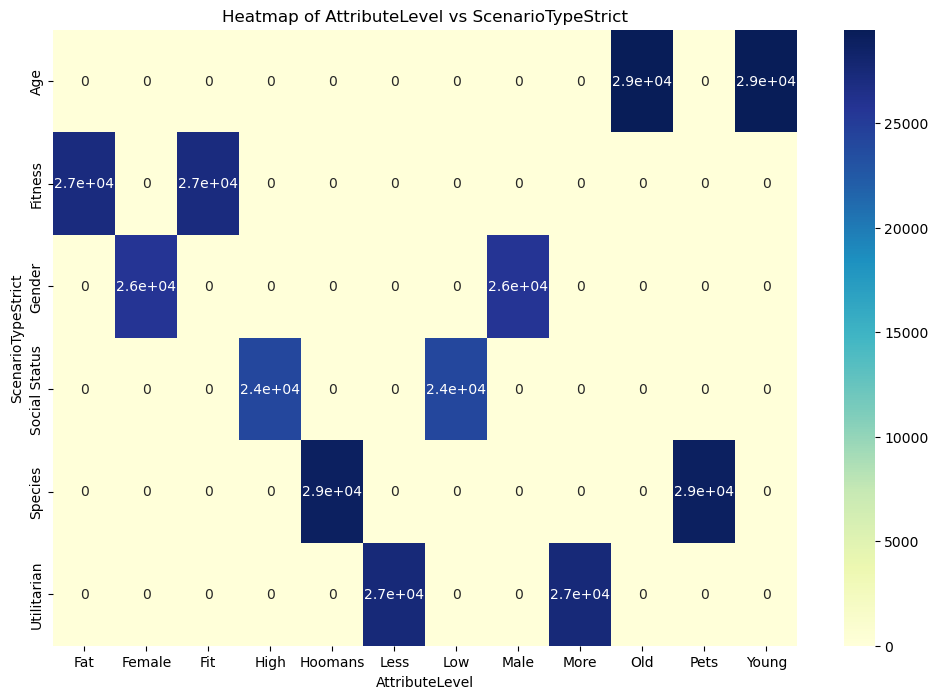

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(df_llm['ScenarioTypeStrict'], df_llm['AttributeLevel'])

plt.figure(figsize=(12,8))

# Plot a heatmap
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title('Heatmap of AttributeLevel vs ScenarioTypeStrict')
plt.xlabel('AttributeLevel')
plt.ylabel('ScenarioTypeStrict')
plt.show()

In [35]:
df_llm.ScenarioTypeStrict.value_counts()

ScenarioTypeStrict
Age              58964
Species          57830
Utilitarian      54862
Fitness          54154
Gender           51574
Social Status    48268
Name: count, dtype: int64

In [36]:
df_llm.drop(df_llm[df_llm['ScenarioTypeStrict'].isin(['Social Status'])].index, inplace=True)

In [37]:
df_llm.shape

(277384, 31)

In [38]:
df_llm['AttributeLevel'].value_counts()

AttributeLevel
Young      29482
Old        29482
Hoomans    28915
Pets       28915
Less       27431
More       27431
Fat        27077
Fit        27077
Male       25787
Female     25787
Name: count, dtype: int64

In [86]:
# no need to delete any rows in the 'AttributeLevel' column, as High and low are both already deleted cause you delete the Social Status rows

In [87]:
# df_llm.to_csv('llm_deleted_dataset.csv', index=False)

In [ ]:
# randomly keeping 250000 of the dataset
# 250000 rows = 250000 / 2 = 125000 unique responseID's

In [ ]:
# randomly keep 250000 unique responseID's LLM dataset

# Getting unique UserIDs
Response_unique = df_llm['ResponseID'].unique()
print(len(Response_unique))  # should be 325652/2 = 138692

# Selecting 125000 UserIDs from the unique set
Response_keep_llm = pd.Series(Response_unique).sample(n=125000, random_state=42)
print(len(Response_keep_llm))  # should be 125000

138692
125000


In [41]:
df_llm.head()

,ResponseID,UserID,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,NumberOfCharacters,DiffNumberOFCharacters,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,res_00000000,1,0,0,1,0,Hoomans,Species,3,0,...,0,0,0,0,0,0,1,0,0,0
1,res_00000000,1,1,0,0,0,Pets,Species,3,0,...,0,0,0,0,0,0,0,0,1,2
2,res_00000001,1,0,0,1,0,Male,Gender,2,0,...,0,0,0,0,0,0,0,0,0,0
3,res_00000001,1,1,0,0,2,Female,Gender,2,0,...,0,0,0,0,0,0,0,0,0,0
4,res_00000002,1,1,1,0,2,Young,Age,1,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_llm_sub = df_llm[df_llm['ResponseID'].isin(Response_keep_llm)]

In [ ]:
df_llm_sub.shape

# should be 250000 rows

(250000, 31)

In [44]:
# concatanating the datasets, with mme after llm cause of ResponseID, and resetting the index

df_concat = pd.concat([df_llm_sub, df_total_clean_del], axis=0)
df_total_complete = df_concat.reset_index(drop=True)

In [45]:
df_total_complete.shape

(500000, 31)

In [46]:
df_total_complete['UserID'].value_counts(normalize=True)

UserID
1    0.5
0    0.5
Name: proportion, dtype: float64

In [96]:
# check to see if no more Social Status and High and Low in the dataset

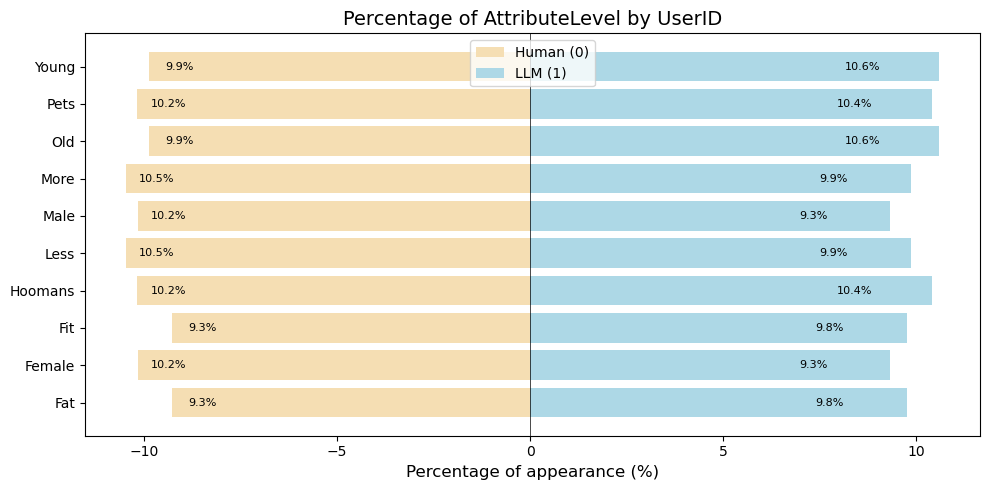

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by UserID and AttributeLevel, count occurrences
grouped_data = df_total_complete.groupby(['UserID', 'AttributeLevel']).size().unstack(fill_value=0)

# Normalize each row to get percentages within UserID group
percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Extract percentages for UserID = 0 and UserID = 1 separately
percentage_0 = percentages.loc[0]
percentage_1 = percentages.loc[1]

# Plotting
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Define the positions of the bars on the y-axis
y_pos = np.arange(len(percentage_0))

# Plot the negative percentages for UserID = 0 on the left side
bars_0 = ax.barh(y_pos, -percentage_0, align='center', color='wheat', label='Human (0)', height=0.8)

# Plot the positive percentages for UserID = 1 on the right side
bars_1 = ax.barh(y_pos, percentage_1, align='center', color='lightblue', label='LLM (1)', height=0.8)

# Add labels for ScenarioTypeStrict categories
ax.set_yticks(y_pos)
ax.set_yticklabels(percentage_0.index)

# Add labels and title
plt.title('Percentage of AttributeLevel by UserID', fontsize=14)
ax.set_xlabel('Percentage of appearance (%)', fontsize=12)

# Add a vertical line at 0 to separate the two sides
ax.axvline(0, color='black', linewidth=0.5)

# Add legend
plt.legend(loc='upper center')

# Add percentage labels inside the bars
# Adding labels for UserID = 0 (negative bars)
for bar in bars_0:
    width = bar.get_width()
    ax.text(width + 0.8, bar.get_y() + bar.get_height()/2, f'{-width:.1f}%', 
            ha='center', va='center', color='black', fontsize=8)

# Adding labels for UserID = 1 (positive bars)
for bar in bars_1:
    width = bar.get_width()
    ax.text(width - 2, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
            ha='center', va='center', color='black', fontsize=8)

# Display the plot
plt.tight_layout()
plt.show()


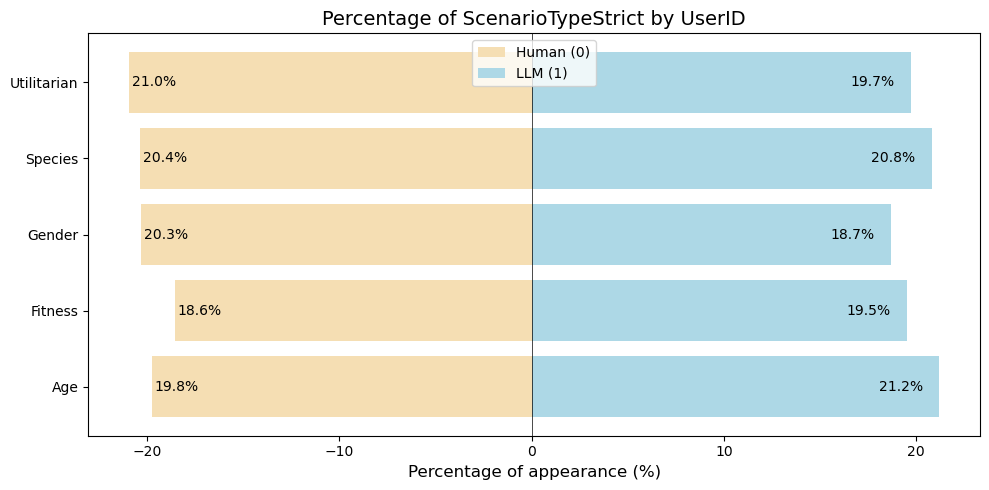

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by UserID and ScenarioTypeStrict, count occurrences
grouped_data = df_total_complete.groupby(['UserID', 'ScenarioTypeStrict']).size().unstack(fill_value=0)

# Normalize each row to get percentages within UserID group
percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Extract percentages for UserID = 0 and UserID = 1 separately
percentage_0 = percentages.loc[0]
percentage_1 = percentages.loc[1]

# Plotting
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Define the positions of the bars on the y-axis
y_pos = np.arange(len(percentage_0))

# Plot the negative percentages for UserID = 0 on the left side
bars_0 = ax.barh(y_pos, -percentage_0, align='center', color='wheat', label='Human (0)', height=0.8)

# Plot the positive percentages for UserID = 1 on the right side
bars_1 = ax.barh(y_pos, percentage_1, align='center', color='lightblue', label='LLM (1)', height=0.8)

# Add labels for ScenarioTypeStrict categories
ax.set_yticks(y_pos)
ax.set_yticklabels(percentage_0.index)

# Add labels and title
plt.title('Percentage of ScenarioTypeStrict by UserID', fontsize=14)
ax.set_xlabel('Percentage of appearance (%)', fontsize=12)

# Add a vertical line at 0 to separate the two sides
ax.axvline(0, color='black', linewidth=0.5)

# Add legend
plt.legend(loc='upper center')

# Add percentage labels inside the bars
# Adding labels for UserID = 0 (negative bars)
for bar in bars_0:
    width = bar.get_width()
    ax.text(width + 1.3, bar.get_y() + bar.get_height()/2, f'{-width:.1f}%', 
            ha='center', va='center', color='black', fontsize=10)

# Adding labels for UserID = 1 (positive bars)
for bar in bars_1:
    width = bar.get_width()
    ax.text(width - 2, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
            ha='center', va='center', color='black', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


In [49]:
# saving the dataset

df_total_complete.to_csv('deleted_dataset.csv', index=False)